# Promises -> Async/Await using Codegen

#####  This notebook goes over how to convert several different *`promise.then`* syntax to use *`async/await`*

The following promise chain conversions are supported: 

1. Then statements -> unwrap block

2. Catch statements -> try/catch

3. Finally statements -> try/catch/finally

4. Top-level returns

5. Top-level variable assignments

6. Ambiguous then/catch/finally block returns -> annonymous functions

7. Multiple promise chains in function block


In [ ]:
from codegen import Codebase

In [ ]:
codebase = Codebase(repo_path="./", language="typescript")

# 1. Small Promise Chain -> Async/Await

In [ ]:
promise_chain = codebase.get_function("getValue").promise_chains[0]

print("\n=== Promise Chain Analysis ===")
print("Base Chain:", promise_chain.base_chain)
print("Then Chain:", promise_chain.then_chain)

---
```typescript
// 1. Test with one .then
// Input -> 
function getValue(): Promise<number> {
    return Promise.resolve(10).then(value => {
      return value * 2;
    });
}
```
---

In [ ]:
# asyncify getValue promise Chain
promise_chain.convert_to_async_await()
codebase.commit()

#### *Converts to...*

---
```typescript
async function getValue(): Promise<number> {
        let value = await Promise.resolve(10);
    return value * 2;
}
```
---

In [ ]:
# reset changes
codebase.reset()

# 2. Medium Length Promise Chain -> Async/Await

In [ ]:
promise_chain = codebase.get_function("getUserDataAndPosts").promise_chains[0]

print("\n=== Promise Chain Analysis ===")
print(f"Base Chain: {promise_chain.base_chain}")
print(f"Then Chain: {promise_chain.then_chain}")
print(f"Catch Call: {promise_chain.catch_call}")

---
```typescript
// 2. Example of medium length promise chain
function getUserDataAndPosts(userId: number): Promise<void> {
    fetchUserData(userId)
        .then((user) => {
            console.log('User:', user);
            return fetchUserPosts(user.id);
        })
        .then((posts) => {
            console.log('Posts:', posts);
            return fetchPostComments(posts[0].id);
        })
        .then((comments) => {
            console.log('Comments:', comments);
        })
        .catch((error) => {
            console.error('Error:', error.message);
        });
}
```
---

In [ ]:
promise_chain.convert_to_async_await()
codebase.commit()

#### *Converts to...*
---
```typescript
async function getUserDataAndPosts(userId: number): Promise<void> {
    
    try {
    let user = await fetchUserData(userId);
        console.log('User:', user);
    let posts = await fetchUserPosts(user.id);

        console.log('Posts:', posts);
    let comments = await fetchPostComments(posts[0].id);

    console.log('Comments:', comments);
    } catch(error: any) {
        console.error('Error:', error.message);
    }
}

```
---

In [ ]:
codebase.reset()

# 3. Promise.all Example with Multiple Variable Assignments

In [ ]:
promise_chain = codebase.get_function("getAllUserInfo").promise_chains[0]


print("\n=== Promise Chain Analysis ===")
print(f"Base Chain: {promise_chain.base_chain}")
print(f"Then Chain: {promise_chain.then_chain}")


---
```typescript
// 3. Promise.all example with assignment of two variables
function getAllUserInfo(userId: number) {
    return Promise.all([
        fetchUserData(userId),
        fetchUserPosts(userId)
    ])
    .then(([user, posts]) => {
        return {
            user,
            posts
        };
    });
}
```
---

In [ ]:
promise_chain.convert_to_async_await()
codebase.commit()

#### *Converts to...*
---
```typescript
async function getAllUserInfo(userId: number) {
        let [user, posts] = await Promise.all([
        fetchUserData(userId),
        fetchUserPosts(userId)
    ]);
    return {
            user,
            posts
        };
}
```
---

In [ ]:
codebase.reset()

# 4. Promise Chain with Try/Catch/Finally blocks + Top-level Return

In [ ]:
promise_chain = codebase.get_function("processUserData").promise_chains[0]


print("\n=== Promise Chain Analysis ===")
print(f"Base Chain: {promise_chain.base_chain}")
print(f"Then Chain: {promise_chain.then_chain}")
print(f"Catch Call: {promise_chain.catch_call}")
print(f"Finally Call: {promise_chain.finally_call}")

```typescript
// 4. Promise Chain with Try/Catch/Finally blocks + Top-level Return
function processUserData(userId: number): Promise<void> {
    return fetchUserData(userId)
        .then((user) => {
            console.log('Found user:', user);
            return fetchUserPosts(userId);
        })
        .then((posts) => {
            console.log('Found posts:', posts);
            throw new Error('Something went wrong!');
        })
        .then(() => {
            console.log('This will not execute due to the error above');
        })
        .catch((error) => {
            console.error('Caught error:', error.message);
        })
        .finally(() => {
            console.log('Cleanup operations here');
        });
}
```

In [ ]:
promise_chain.convert_to_async_await()
codebase.commit()

#### *Converts to...*
---
```typescript
async function processUserData(userId: number): Promise<void> {
    
    try {
        let user = await fetchUserData(userId);
        console.log('Found user:', user);
        let posts = await fetchUserPosts(userId);

        console.log('Found posts:', posts);
        throw new Error('Something went wrong!');

        console.log('This will not execute due to the error above');
    } catch(error: any) {
        console.error('Caught error:', error.message);
    } finally {
        console.log('Cleanup operations here');
    }
}
```
---

In [ ]:
codebase.reset()

# 5. Lengthy Promise Chain with Top-level Variable Assignment

In [ ]:
promise_chain = codebase.get_function("ensureTable").promise_chains[0]

print("\n=== Promise Chain Analysis ===")
print(f"Base Chain: {promise_chain.base_chain}")
print(f"Then Chain: {promise_chain.then_chain}")
print(f"Catch Call: {promise_chain.catch_call}")
print(f"Finally Call: {promise_chain.finally_call}")

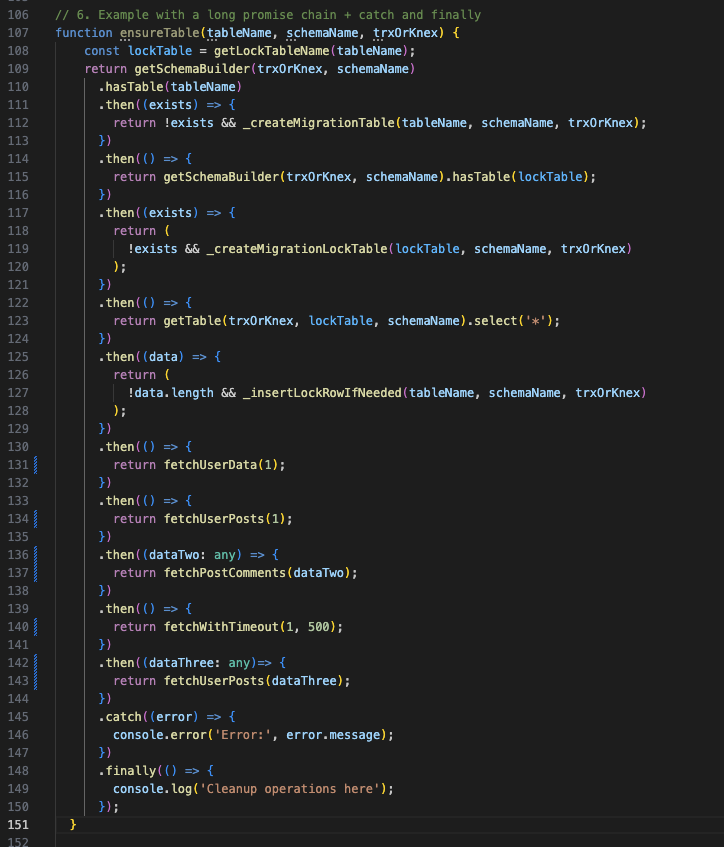

In [ ]:
promise_chain.convert_to_async_await()
codebase.commit()

#### *Converts to...*
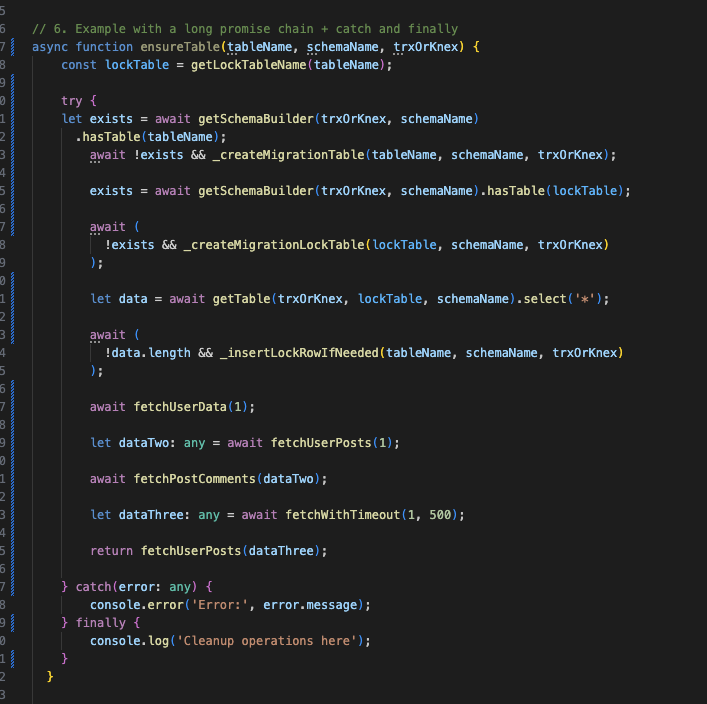

In [ ]:
codebase.reset()

# 6. Promise Chain with Conditional Returns + Top-level Variable Assignment

In [ ]:
promise_chain = codebase.get_function("create").promise_chains[0]

print("\n=== Promise Chain Analysis ===")
print(f"Base Chain: {promise_chain.base_chain}")
print(f"Then Chain: {promise_chain.then_chain}")

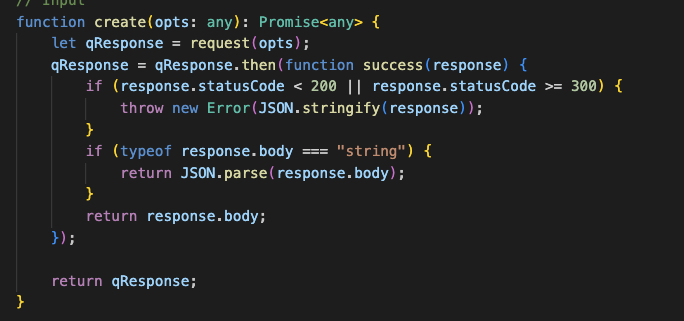
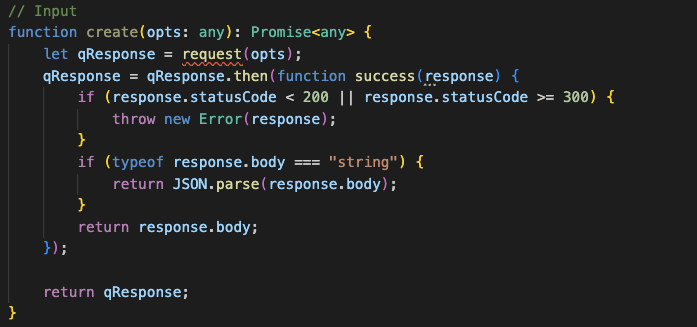
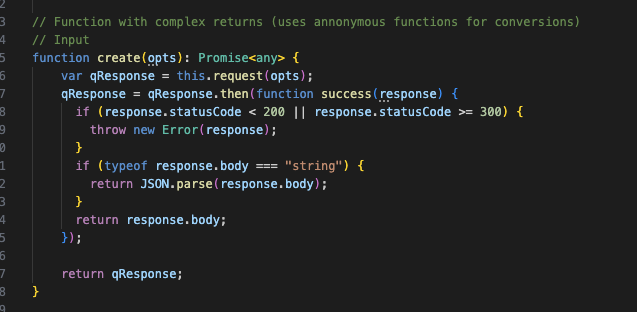

In [ ]:
promise_chain.convert_to_async_await()
codebase.commit()

#### *Converts to...*
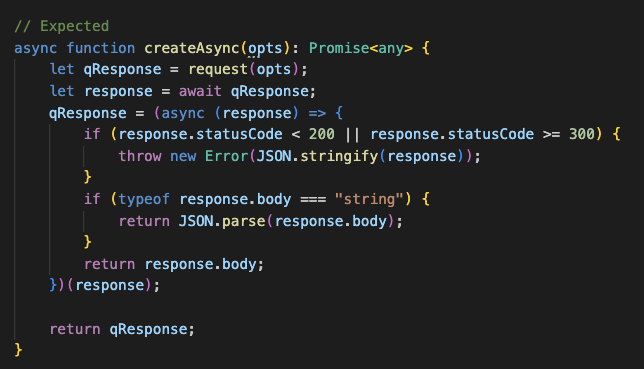
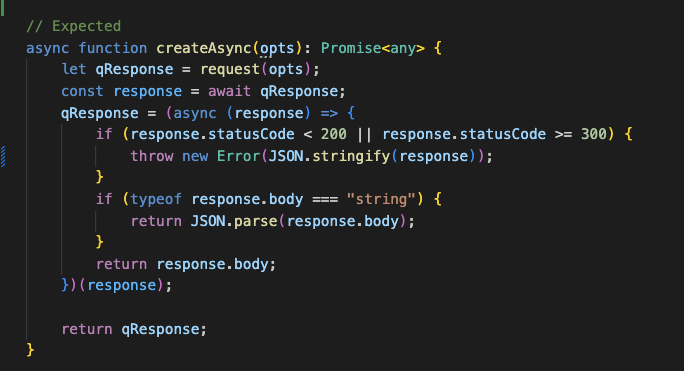

In [ ]:
codebase.reset()

# 7. Multiple Promise Chains with Top-level Variable Assignment, Implicit Returns and Try/Catch

In [ ]:
file = codebase.get_function("runExamples")
promise_chains = file.promise_chains

for promise_chain in promise_chains:
    print(f"\n=== Promise Chain Analysis for '{promise_chain.name}()' ===")
    print(f"Base Chain: {promise_chain.base_chain}")
    print(f"Then Chain: {promise_chain.then_chain}")

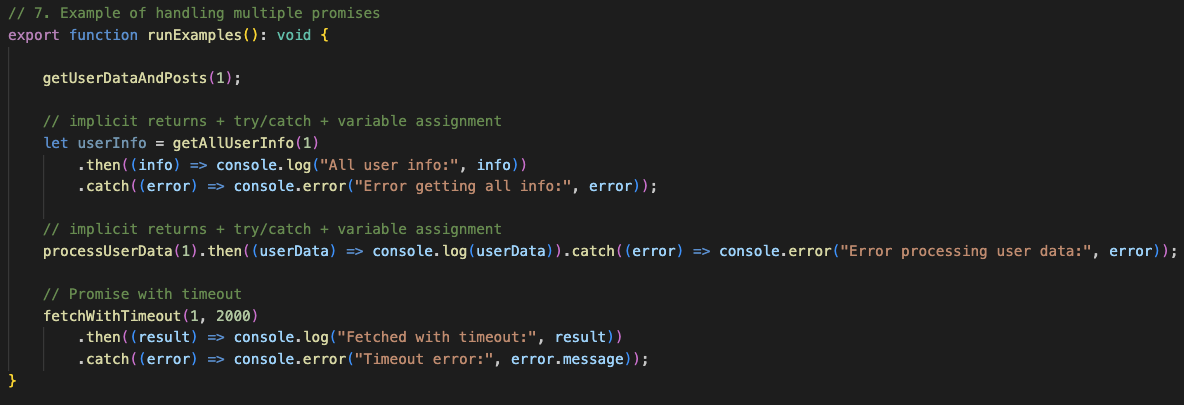
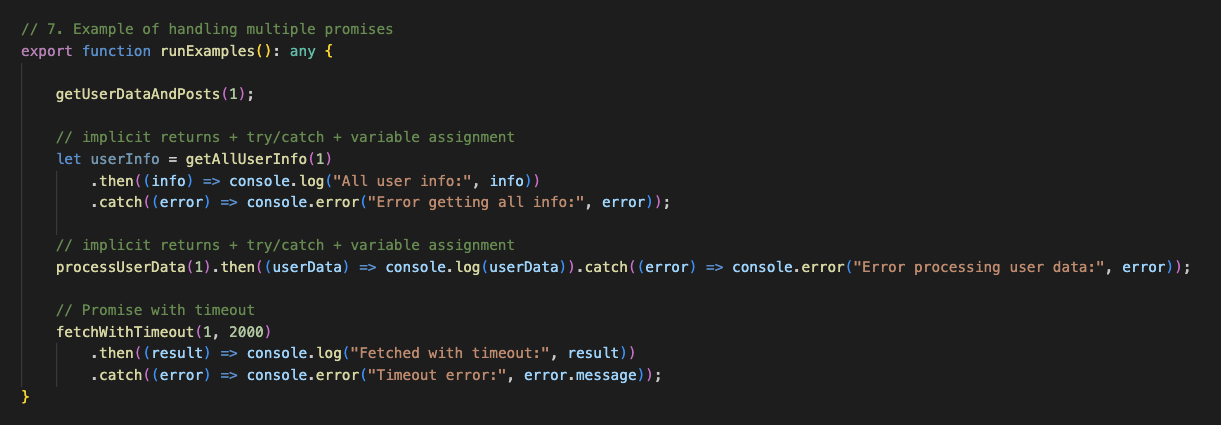
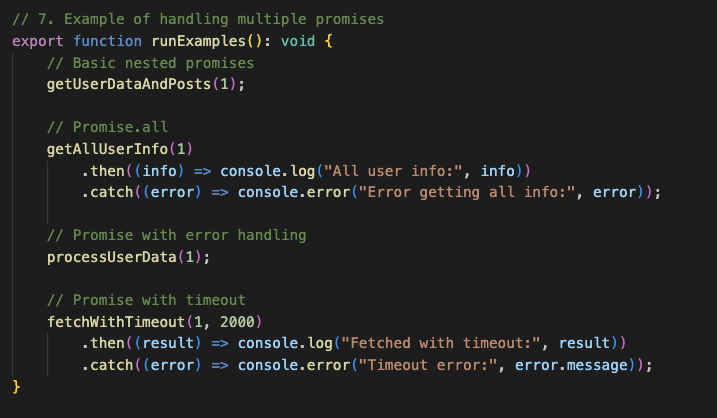

In [ ]:
# convert both promise chains to async await
for promise_chain in promise_chains:
    promise_chain.convert_to_async_await()

codebase.commit()

#### *Converts to...*

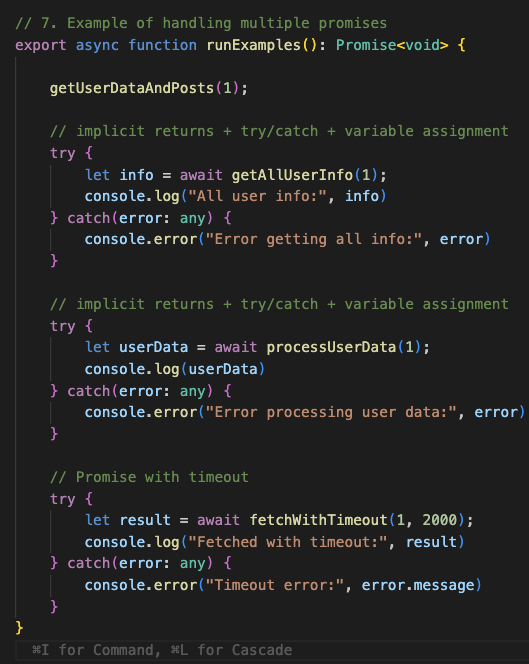

In [ ]:
codebase.reset()